# 0.0 Imports

In [57]:
import math
import numpy  as np
import pandas as pd
import inflection

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

## 0.1 Helper functions

In [65]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [63]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading data

In [2]:
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)

In [3]:
# merge
df_raw = pd.merge(df_sales_raw,df_store_raw, how ='left', on='Store')

# 1.0 Descrição dos dados

In [4]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename columns

In [5]:
df1 = df_raw.copy()

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list (map (snakecase, cols_old))

In [7]:
df1.columns = cols_new

## 1.2 Data dimensions

In [8]:
print ('Number of rows: {}'.format(df1.shape[0]))
print ('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 1017209
Number of columns: 18


## 1.3 Data types 

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
# Convertendo coluna 'date' para tipo 'datetime'
df1['date'] = pd.to_datetime( df1['date'] )

## 1.4 Check NA's

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [12]:
df1['competition_distance'].max()

75860.0

In [20]:
#competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

#competition_open_since_month  
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

#competition_open_since_year  
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

#promo2_since_week  
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year  
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

In [17]:
#promo_interval              
month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [18]:
df1.sample(5).T

,416216,981804,979121,47585,21911
store,1107,275,937,756,727
day_of_week,2,5,1,5,7
date,2014-06-24 00:00:00,2013-02-01 00:00:00,2013-02-04 00:00:00,2015-06-19 00:00:00,2015-07-12 00:00:00
sales,5074,6550,9672,17557,0
customers,646,704,684,2239,0
open,1,1,1,1,0
promo,0,0,1,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,d,d,a,a


In [19]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month         0
competition_open_since_year          0
promo2                               0
promo2_since_week                    0
promo2_since_year               508031
promo_interval                       0
promo2_since_year                    0
month_map                            0
is_promo                             0
dtype: int64

## 1.6 Change types

In [22]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
promo2_since_year                      float64
month_map                               object
is_promo                                 int64
dtype: object

In [23]:
# competiton
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
    
# promo2
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7 Estatística descritiva dos dados 

In [25]:
# Separação de variáveis numéricas e categóricas
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [28]:
num_attributes.sample(5)

,state_holiday,store_type,assortment,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year,promo_interval,month_map
699359,0,a,a,2,2013,10,2014,"Jan,Apr,Jul,Oct",Oct
722085,0,a,a,11,2012,5,2013,"Feb,May,Aug,Nov",Sep
22780,0,c,c,7,2015,44,2012,"Feb,May,Aug,Nov",Jul
787007,0,a,a,4,2007,13,2010,"Jan,Apr,Jul,Oct",Jul
757523,0,a,c,11,2010,34,2013,0,Aug


### 1.7.1 Variáveis numéricas

In [36]:
# Tendência central - média, mediana 
ct1 = pd.DataFrame(num_attributes.apply(np.std)).T 
ct2 =  pd.DataFrame(num_attributes.apply(np.median)).T 

In [37]:
# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T 
d2 = pd.DataFrame(num_attributes.apply(min)).T 
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

In [41]:
# Concatenar
df = pd.concat( [d2, d3, d4, ct1, ct2,d1, d5, d6] ).T.reset_index()
df

,index,0,0,0,0,0,0,0,0
0,store,1.0,1115.0,1114.0,321.908493,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,1.997390,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,3849.924283,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,464.411506,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.375539,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.485758,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.383056,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,12547.646829,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500000,1.0,0.500000,-0.002255,-1.999999
9,promo2_since_year,2009.0,2015.0,6.0,1.662657,2013.0,1.662657,-0.784436,-0.210075


In [40]:
# Muda nome colunas
df.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,321.908493,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,1.997390,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,3849.924283,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,464.411506,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.375539,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.485758,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.383056,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,12547.646829,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500000,1.0,0.500000,-0.002255,-1.999999
9,promo2_since_year,2009.0,2015.0,6.0,1.662657,2013.0,1.662657,-0.784436,-0.210075


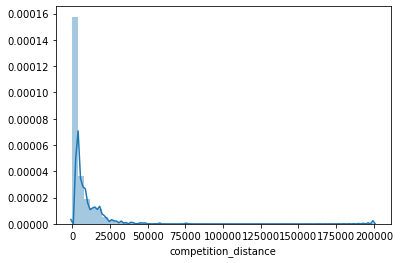

In [48]:
# Plota a distribuição da variável competition_distance
sns.distplot( df1['competition_distance'])

### 1.7.2 Variáveis categóricas

In [51]:
# Seleciona os valores por variável categórica
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

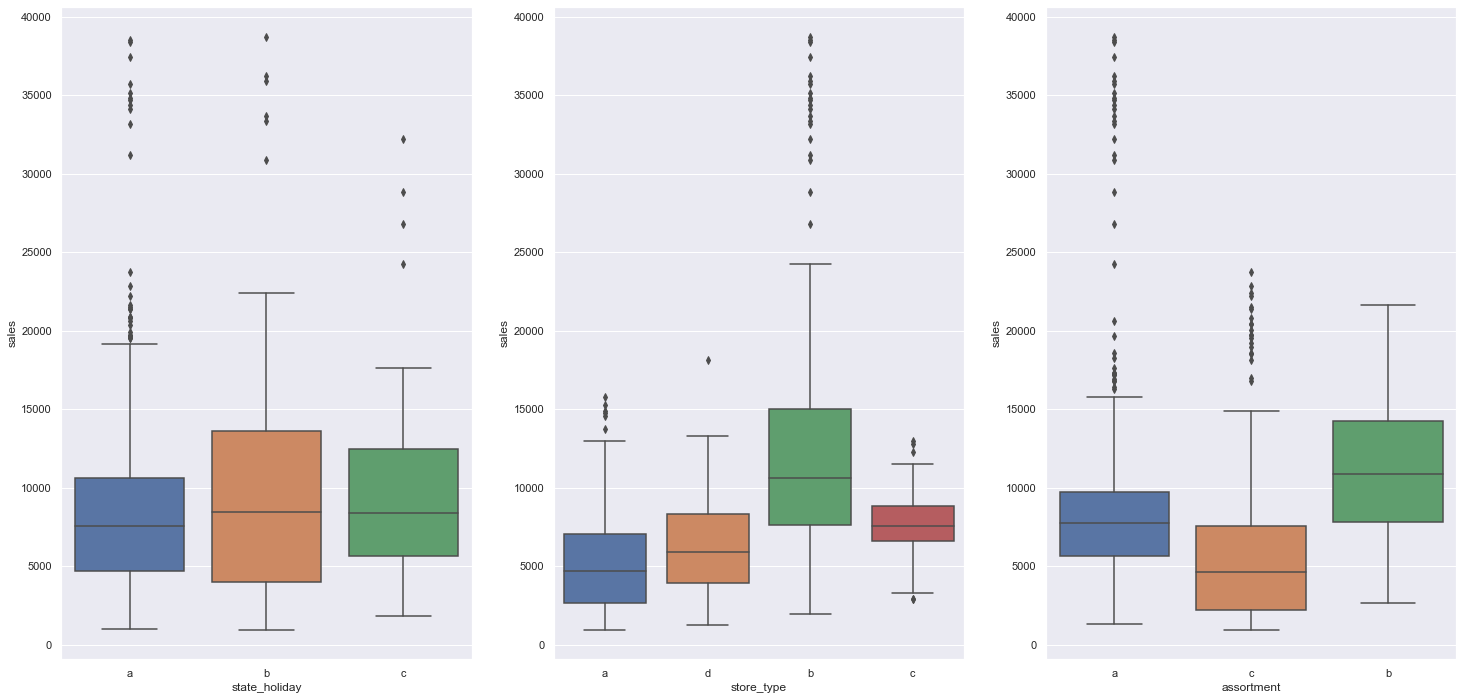

In [64]:
# Gráfico boxplot
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )

# Fim do Código